# Examen 1

## Miércoles 2 de septiembre de 2015

In [34]:
using PyPlot;

INFO: Loading help data...


Instrucciones:

- Crea una copia del notebook con título "Examen 1_TU NOMBRE".

- Contesta las preguntas en celdas nuevas, escribiendo código de Julia. Pon explicaciones de lo que estás haciendo si sea necesario. Haz tu código legible y entendible.

- Entrega el examen por correo a los ayudantes.

[1] 

(i) Escribe una función `doble_factorial` que calcula recursivamente el *doble factorial*, definido por 

$$n!! := n \times (n-2) \times (n-4) \times \cdots$$

hasta $2$ (para números $n$ pares) o $1$ (para números $n$ impares).

In [35]:
### Solución de 1.i

### Esta función acepta un entero n para el cual calcula su doble factorial con recursión
function doble_factorial(n::Int)
    ## Primero checamos si llegamos al final de la recursión
    if n == 1 || n == 2
        return n;
    end
    
    return n * doble_factorial(n-2);
end

## Pruebas rápidas
println(doble_factorial(5) == 15)
println(doble_factorial(6) == 48)
println(doble_factorial(2) == 2)

true
true
true


#### 1/1

#### Bien!

(ii) Escribe una versión iterativa de esta misma función.

In [36]:
### Solución de 1.ii

function doble_factorial_iter(n::Int)
    k = n # Variable que vamos a estar disminuyendo
    product = 1 # El producto que se estará calculando para regresarlo de la función
    
    # Calculamos el producto
    while k >= 2
        product *= k
        k -= 2
    end
    
    return product
end

## Pruebas rápidas
println(doble_factorial_iter(5) == 15)
println(doble_factorial_iter(6) == 48)
println(doble_factorial_iter(2) == 2)

true
true
true


#### 1/1

#### Ten cuidado con los `;`, no son necesarios en Julia y de hecho podrían hacer cosas inesperadas como no regresar algo. 

### Ejercicio 1: 2/2

[2] 

(i) Escribe una función para calcular $\cos$ a través de su serie de Taylor:

$$\cos(x) = 1 - \frac{1}{2!} x^2 + \frac{1}{4!} x^4 + \cdots$$

La función debe tomar como argumentos el valor de $x$, así como una tolerancia, y debe calcular la serie *hasta que* el último término que se incorpora sea menor que la tolerancia.

In [37]:
### Solución de 2.i

### Esta función calcula el coseno de x iterativamente hasta que el término superior de la
### expansión de Taylor sea menor que la tolerancia ϵ
function mi_cos(x, ϵ)
    value = 0; # El resultado
    n = 0; # El índice del término inicial
    
    ## No es lo más elegante, pero funciona igual de bien
    while true
        # Calculamos el nuevo término de la expansión y lo agregamos a nuestra aproximación
        # Note que el factorial usa big para evitar errores de punto flotante
        new_term = (-1)^n/factorial(big(2n)) * x^(2n);
        value += new_term;
        
        # Checamos si el nuevo término es menor que la tolerancia
        if abs(new_term) < ϵ
            return value
        end
        
        # Incrementamos el contador
        n += 1;
    end
end

### Pruebas rápidas (mientras más cerca a 0, mejor)
println(mi_cos(0, 1e-6) - 1)
println(mi_cos(2π, 1e-6) - 1)
println(mi_cos(π/2, 1e-6))


0e+00
3.196766184936011023332744545624212405747920947779256762032487116566774228417176e-09
6.321469497588008355733627697911720146928234425521751910640799529688421577510601e-09


#### 1/1

#### Es mejor que llames a la función y que regrese algo, a que imprimas con `println`. También deberías de ponerle nombres a tus variables.

*Gracias, pero usé println para imprimir 3 resultados en lugar de solo el último. Y respecto a nombres de variables, yo vi que al menos en NumPy que epsilon es estándar para denotar la tolerancia *

(ii) Utiliza tu función para hacer arreglos de valores de $\cos(x)$ para valores de $x$ en un rango con tolerancias diferentes.  [Esta parte se puede combinar con la parte (iii).]

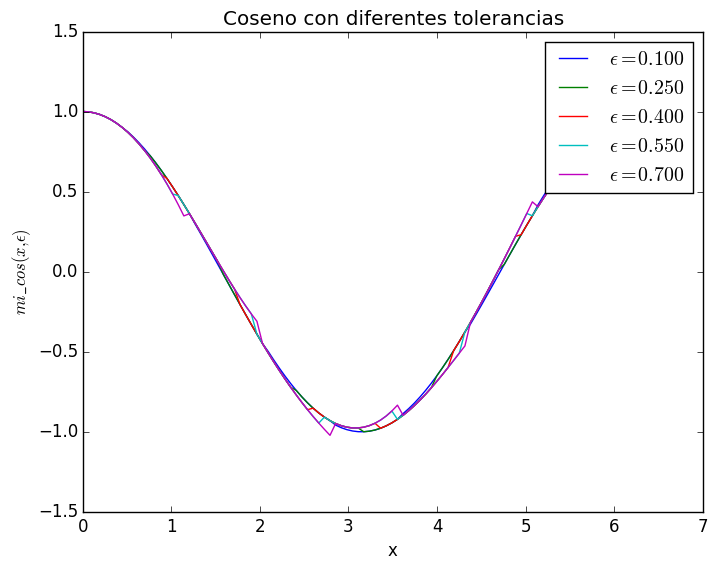

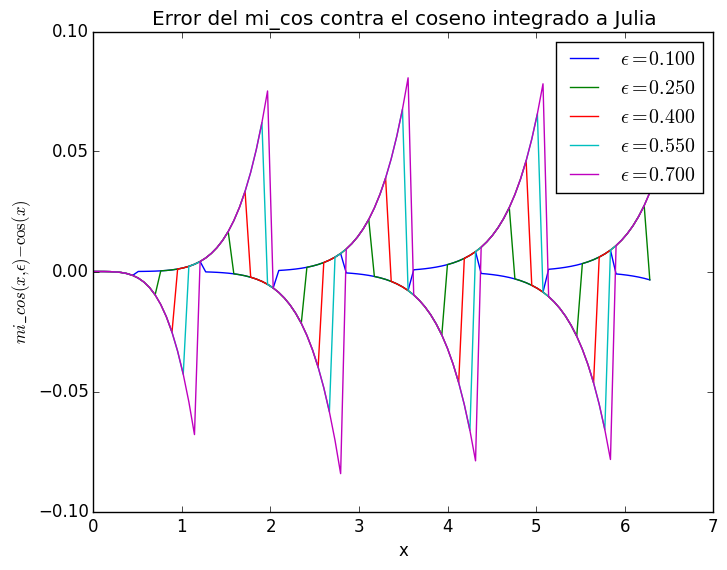

In [60]:
### Nuestro rango de x sera de 0 a 2π:
xrange = linspace(0, 2π, 100);

### Y este es el rango de tolerancias
tolrange = linspace(0.1, 0.7, 5);

### Entonces creamos las gráficas
figure(1);
for ϵ in tolrange
    lab = @sprintf "\$\\epsilon=%.3f\$" ϵ # Una leyenda sin artefactos de punto flotante
    plot(xrange, [convert(Float64, mi_cos(x, ϵ)) for x in xrange], label=lab)
end

title("Coseno con diferentes tolerancias");
legend()
xlabel("x");
ylabel(L"$mi\_cos(x, \epsilon)$");

figure(2);
for ϵ in tolrange
    lab = @sprintf "\$\\epsilon=%.3f\$" ϵ # Una leyenda sin artefactos de punto flotante
    plot(xrange, [convert(Float64, mi_cos(x, ϵ))-cos(x) for x in xrange], label= lab)
end

title("Error del mi_cos contra el coseno integrado a Julia");
legend();
xlabel("x");
ylabel(L"$mi\_cos(x, \epsilon) - \cos(x)$");


#### 1/1
#### 1/1

#### Falta una leyenda de qué color corresponde a qué tolerancia, y las leyendas de los ejes deberían de decir qué graficas (ej: error, coseno, etc). X y Y no me dicen nada.

*Gracias. Corregido.*

(iii) En una gráfica, grafica los resultados con distintas tolerancias y los valores "exactos" usando la función `cos` de Julia. En otra gráfica, grafica las *diferencias* (errores) de tus resultados comparados con los valores exactos.

### Ejercicio 2: 3/3

[3]

Considera la función $f(x) = x^2 - x - 1$. Queremos resolver $f(x)=0$. Una manera distinta de encontrar una raíz de esta función es con un llamado *método de punto fijo*: se reescribe la ecuación que se quiere resolver (es decir, $f(x)=0$) en forma de método iterativo,  en el cual algún $x$ se reemplaza con $x_n$ y otro como $x_{n+1}$.

(i) Escribe el término $x^2$ como $x_{n+1}^2$ y el otro término que contiene $x$ como $x_n$. Resuelve para $x_{n+1}$ en términos de $x_n$. Itera el método resultante hasta que converja. Verifica que el resultado coincide con una solución analítica. ¿Cómo afecta el resultado la condición inicial desde la cual iteras?

## Solución 3.i
Primero, las soluciones analíticas de esta ecuación son:
$$x = \frac{1 \pm \sqrt{5}}{2}$$

La reescribimos según fué sugerido:
$$x_{n+1}^2 - x_n - 1 = 0 $$

Y despejamos $x_{n+1}$:
$$x_{n+1} = \pm \sqrt{x_n + 1}$$

#### Y la raíz negativa?
*Gracias, buen punto. Lo corregí.*

In [39]:
### Ahora implementaremos el código

# Esta función toma una adivinanza inicial, el número de recursiones a realizar(100 por defecto)
# y la relación de recurrencia a usar (en forma de función, sqrt(x0 + 1) por defecto)
function find_my_root_general(x0, n::Int=100, f = (x -> sqrt(x + 1)))
    # Checamos si llegamos al límite de recursión
    if n == 0
        return x0
    end
    
    # Recursión
    return find_my_root_general(f(x0), n-1, f);
end

println("Las raices analíticas son:")
println((1 + sqrt(5))/2)
println((1 - sqrt(5))/2)

println("\nUna de las raices numéricas (con x_{n+1} = sqrt(x_n + 1)) es:")
println(find_my_root_general(-1))

println("\nLa otra raiz numérica (con x_{n+1} = -sqrt(x_n + 1)) es:")
println(find_my_root_general(-0.8, 100, (x -> -sqrt(x+1))))

### Note que las raices numéricas coinciden muy bien con la analíticas

Las raices analíticas son:
1.618033988749895
-0.6180339887498949

Una de las raices numéricas (con x_{n+1} = sqrt(x_n + 1)) es:
1.618033988749895

La otra raiz numérica (con x_{n+1} = -sqrt(x_n + 1)) es:
-0.618033988878259


#### 0.8/1

#### Faltó contestar la pregunta, cómo afecta la condición inicial al resultado?
*Es cierto. Aquí va la respuesta:*

La primera de las secuencias aparentemente converge a su raiz analítica correspondiente para todo $x_0 \geq -1$:

In [40]:
for x0 in [-1:1:10]
    print("Para x0 = $x0, la raiz es ")
    println(find_my_root_general(x0))
end

Para x0 = -1, la raiz es 1.618033988749895
Para x0 = 0, la raiz es 1.618033988749895
Para x0 = 1, la raiz es 1.618033988749895
Para x0 = 2, la raiz es 1.618033988749895
Para x0 = 3, la raiz es 1.618033988749895
Para x0 = 4, la raiz es 1.618033988749895
Para x0 = 5, la raiz es 1.618033988749895
Para x0 = 6, la raiz es 1.618033988749895
Para x0 = 7, la raiz es 1.618033988749895
Para x0 = 8, la raiz es 1.618033988749895
Para x0 = 9, la raiz es 1.618033988749895
Para x0 = 10, la raiz es 1.618033988749895


La segunda, sin embargo, se sale de su dominio (i.e. sus $x_n$ empiezan a ser menores a  para ciertos valores de $x_0 \geq -1$. Para algunos otros valores iniciales, da raices incorrectas:

In [41]:
for x0 in [-1:0.1:3]
    print("Para x0 = $x0, \t la raiz es ")
    try
        root = find_my_root_general(x0, 100, (x -> -sqrt(x+1)))
        println(root)
    catch
        println("indefinida")
    end
end

Para x0 = -1.0, 	 la raiz es -1.0
Para x0 = -0.9, 	 la raiz es -0.6180339889822725
Para x0 = -0.8, 	 la raiz es -0.618033988878259
Para x0 = -0.7, 	 la raiz es -0.6180339888031596
Para x0 = -0.6, 	 la raiz es -0.6180339887386952
Para x0 = -0.5, 	 la raiz es -0.6180339886780313
Para x0 = -0.4, 	 la raiz es -0.6180339886168197
Para x0 = -0.3, 	 la raiz es -0.6180339885505574
Para x0 = -0.2, 	 la raiz es -0.6180339884717665
Para x0 = -0.1, 	 la raiz es -0.618033988359833
Para x0 = 0.0, 	 la raiz es -0.0
Para x0 = 0.1, 	 la raiz es indefinida
Para x0 = 0.2, 	 la raiz es indefinida
Para x0 = 0.3, 	 la raiz es indefinida
Para x0 = 0.4, 	 la raiz es indefinida
Para x0 = 0.5, 	 la raiz es indefinida
Para x0 = 0.6, 	 la raiz es indefinida
Para x0 = 0.7, 	 la raiz es indefinida
Para x0 = 0.8, 	 la raiz es indefinida
Para x0 = 0.9, 	 la raiz es indefinida
Para x0 = 1.0, 	 la raiz es indefinida
Para x0 = 1.1, 	 la raiz es indefinida
Para x0 = 1.2, 	 la raiz es indefinida
Para x0 = 1.3, 	 la raiz e

(ii) Reescribe los primeros dos términos como $x(x-1)$. Escoge uno de estas $x$ como $x_{n+1}$ y el otro como $x_n$, y utiliza este nuevo método para encontrar otra raíz. ¿Importa cuál de las dos $x$ se escoge como $x_{n+1}$?

## Solución 3.ii

Reescribimos y la ecuación se vuelve
$$x(x-1) - 1 = 0$$

Ahora aplicamos el método del punto fijo y obtenemos dos posibles ecuaciones:
$$x_{n+1}(x_n-1) - 1 = 0$$ o
$$x_{n}(x_{n+1}-1) - 1 = 0$$
lo cual nos lleva a relaciones de recurrencia

$$x_{n+1} = \frac{1}{x_n - 1}$$ y
$$x_{n+1} = \frac{1}{x_n} + 1$$

In [42]:
### Ahora implementamos el código, reutilizando find_my_root_general

# La función que usa la primera relación de recurrencia
find_my_root_a(x0, n=100) = find_my_root_general(x0, n, x -> 1/(x - 1));

# La función que usa la segunda relación de recurrencia
find_my_root_b(x0, n=100) = find_my_root_general(x0, n, x -> 1/x + 1);

# Encontremos alguna raiz
println(find_my_root_a(-0.5));
println(find_my_root_b(-0.5))

-0.6180339887498948
1.618033988749895


**Conclusión: en este caso, sí importa la selección particular de la relación de recurrencia ya que se encuentran diferentes valores**

#### 1/1

#### En un caso encuentras la raíz negativa, y en el otro la positiva.

(iii) Esta idea no siempre funciona. Muestra numéricamente que el método resultante no converge si tomas el $x$ que aparece sola en la ecuación original (en el término lineal en $x$) como $x_{n+1}$.

## Solución de 3.iii
En este caso, la ecuación se convierte en
$$x_n^2 - x_{n+1} - 1 = 0,$$
lo cual implica que

$$x_{n+1} = x_n^2 - 1$$

In [43]:
### Implementemos el código:
find_my_root_c(x0, n=100) = find_my_root_general(x0, n, x -> x^2 - 1);

## Tratemos de encontrar una raiz
println("Esto no es una raiz:")
println(find_my_root_c(1))

## Y no funcionó, como se esperaba.

Esto no es una raiz:
-1


#### 1/1

#### Bien!

(iv) Toma uno de los dos casos en los cuales sí funciona el método. Empieza con una condición inicial dada, más o menos lejos de la raíz. Construye un arreglo que contiene la distancia de la iterada $x_n$ desde la raíz. Dibuja con escala logarítmica en el eje $y$ cómo cambia esta distancia con el número de pasos. ¿Qué interpretas? [Para dibujar con escala logarítmica en $y$, se puede utilizar `yscale("log")` después del comando de `plot`.]

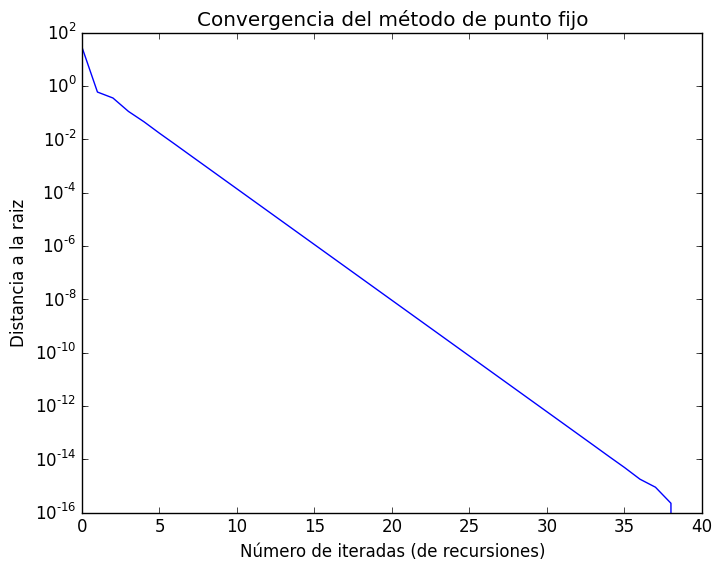

In [44]:
### El rango de número de pasos
nrange = [0:40];

# Empezaremos lejos de la raiz
x0 = 30

## Tomaremos find_my_root_b que converge a (1 + sqrt(5))/2 y calcularemos su distancia absoluta a la raiz
errorrange = [abs(find_my_root_b(30, n) - (1 + sqrt(5))/2) for n in nrange];

plot(nrange, errorrange)
title("Convergencia del método de punto fijo");
xlabel("Número de iteradas (de recursiones)");
ylabel("Distancia a la raiz");
yscale("log");

### Conclusión: 
**La convergencia es representada por una linea recta en una gráfica semilog, lo cual implica una convergencia *exponencial* **

#### 1/1

####Perfecto!

### Ejercicio 3: 3.8/4

# Calificación: 8.8/9

In [45]:
8.8/9*10

9.777777777777779

# 9.8/10

Cuida los `;`, no hace falta que uses `println` sino que puedes llamar directamente a la función, y procura ponerle nombre a tus variables cuando llamas a una función.